# Gesture Recognition Using Android Phone Sensors
This project uses data from Android phone sensors to recognize gestures and control home appliances.


In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#  Define Data Cleaning Function
def clean_data(data):
    cleaned_data = []
    for i, row in data.iterrows():
        try:
            x = literal_eval(row[1])
            y = literal_eval(row[2])
            z = literal_eval(row[3])
            cleaned_data.append([row[0], x, y, z])
        except (ValueError, SyntaxError) as e:
            print(f"Skipping line {i + 1}: {e}")
    return pd.DataFrame(cleaned_data, columns=['label', 'x', 'y', 'z'])


In [4]:
# Define Data Augmentation Function
def augment_data(data, labels):
    augmented_data = []
    augmented_labels = []
    for d, label in zip(data, labels):
        augmented_data.append(d)
        augmented_labels.append(label)
        # 添加噪声
        noise = np.random.normal(0, 0.1, d.shape)
        augmented_data.append(d + noise)
        augmented_labels.append(label)
        # 翻转数据
        augmented_data.append(np.flip(d, axis=0))
        augmented_labels.append(label)
    return np.array(augmented_data), np.array(augmented_labels)

In [3]:
# Load and Clean Training Data
data = pd.read_csv('E:/TFM/gesturesNoXR.csv', header=None)
cleaned_data = clean_data(data)


In [5]:
# Process Training Data
labels = cleaned_data['label']
x_data = cleaned_data['x']
y_data = cleaned_data['y']
z_data = cleaned_data['z']

def merge_data(x_data, y_data, z_data):
    X = []
    for x, y, z in zip(x_data, y_data, z_data):
        combined = np.array([x, y, z]).T
        X.append(combined.tolist())
    return X

X = merge_data(x_data, y_data, z_data)


In [6]:
# Normalize and Encode Data
max_length = max([len(seq) for seq in X])
X = pad_sequences(X, maxlen=max_length, padding='post', dtype='float32')


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y_one_hot = to_categorical(y)


In [7]:
# Data Augmentation and Shuffling
X_scaled, y_one_hot = augment_data(X_scaled, y_one_hot)


X_scaled, y_one_hot = shuffle(X_scaled, y_one_hot)


In [9]:
# Load and Clean Test Data
test_data = pd.read_csv('E:/TFM/gesturesProfeNoXR.csv', header=None)
cleaned_test_data = clean_data(test_data)


In [10]:
# Process Test Data
test_labels = cleaned_test_data['label']
test_x_data = cleaned_test_data['x']
test_y_data = cleaned_test_data['y']
test_z_data = cleaned_test_data['z']

test_X = merge_data(test_x_data, test_y_data, test_z_data)
test_X = pad_sequences(test_X, maxlen=max_length, padding='post', dtype='float32')
test_X_scaled = scaler.transform(test_X.reshape(-1, test_X.shape[-1])).reshape(test_X.shape)
test_y = label_encoder.transform(test_labels)
test_y_one_hot = to_categorical(test_y)

In [11]:
# Define Plot History Function
def plot_history(history):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()




Epoch 1/100


22/22 [==============================] - 3s 44ms/step - loss: 1.3193 - accuracy: 0.3321 - val_loss: 1.2049 - val_accuracy: 0.4241 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 17ms/step - loss: 1.1320 - accuracy: 0.4799 - val_loss: 1.0589 - val_accuracy: 0.5372 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 17ms/step - loss: 0.9126 - accuracy: 0.6187 - val_loss: 0.7693 - val_accuracy: 0.6963 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 16ms/step - loss: 0.7110 - accuracy: 0.7145 - val_loss: 0.6041 - val_accuracy: 0.7479 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 16ms/step - loss: 0.5423 - accuracy: 0.7991 - val_loss: 0.5053 - val_accuracy: 0.7894 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 18ms/step - loss: 0.4746 - accuracy: 0.8282 - val_loss: 0.4667 - val_accuracy: 0.8467 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 17ms/step 

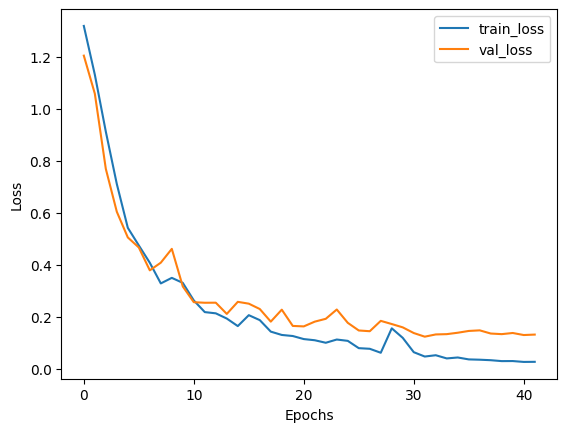

22/22 [==============================] - 1s 4ms/step


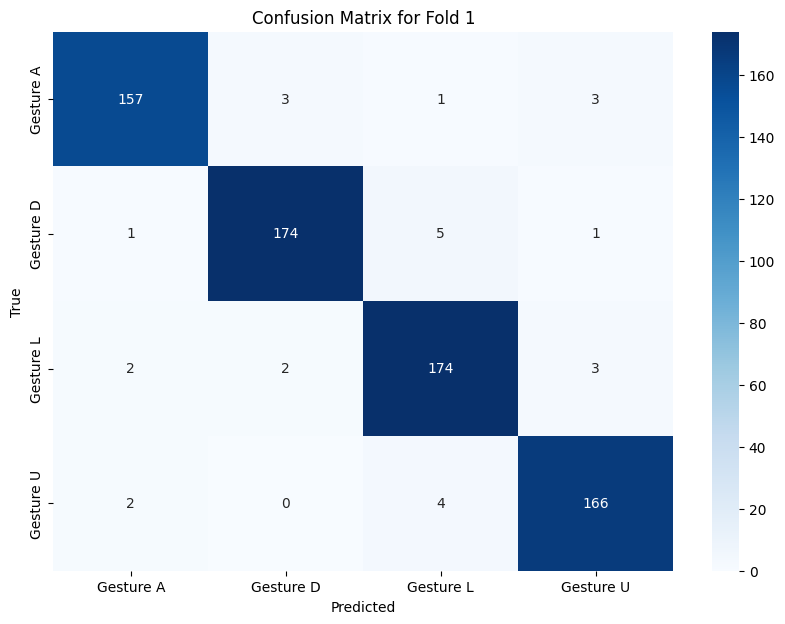

Epoch 1/100
22/22 [==============================] - 3s 40ms/step - loss: 1.3278 - accuracy: 0.3134 - val_loss: 1.1759 - val_accuracy: 0.4648 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 17ms/step - loss: 1.1036 - accuracy: 0.4686 - val_loss: 0.9725 - val_accuracy: 0.5265 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 17ms/step - loss: 0.9712 - accuracy: 0.5317 - val_loss: 0.8559 - val_accuracy: 0.6098 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 16ms/step - loss: 0.7719 - accuracy: 0.6716 - val_loss: 0.6122 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 16ms/step - loss: 0.6340 - accuracy: 0.7451 - val_loss: 0.5722 - val_accuracy: 0.7719 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 17ms/step - loss: 0.5217 - accuracy: 0.8010 - val_loss: 0.4766 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 16ms/step - lo

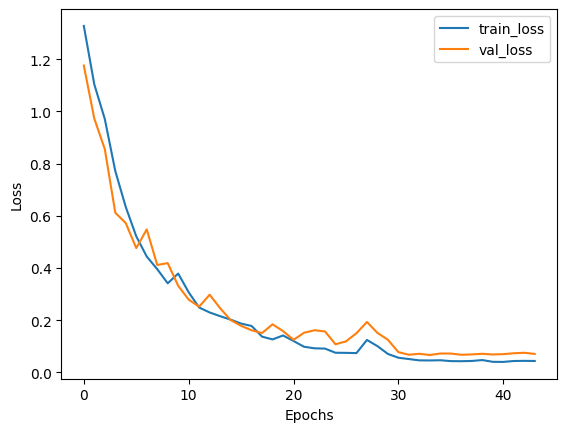

22/22 [==============================] - 0s 3ms/step


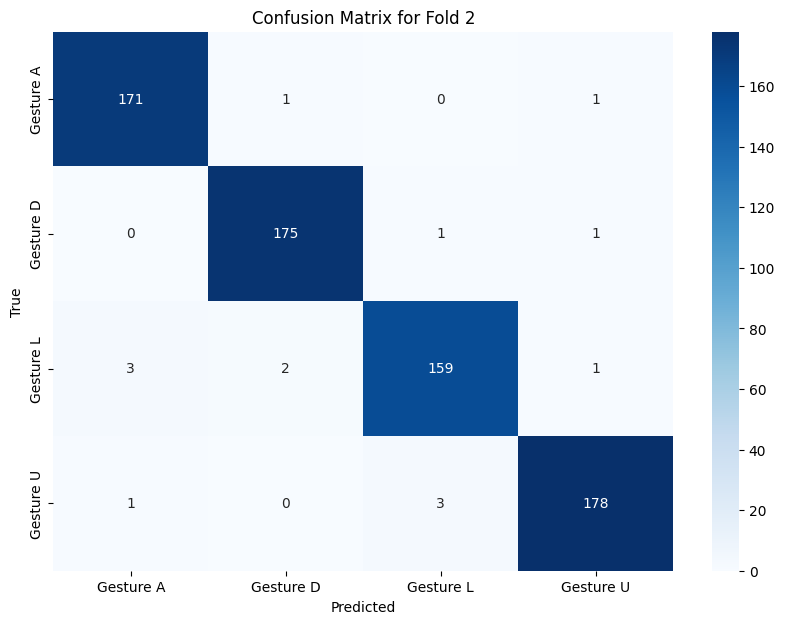

Epoch 1/100
22/22 [==============================] - 3s 41ms/step - loss: 1.3182 - accuracy: 0.3474 - val_loss: 1.1672 - val_accuracy: 0.4534 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 18ms/step - loss: 1.0719 - accuracy: 0.5027 - val_loss: 0.9555 - val_accuracy: 0.5524 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 19ms/step - loss: 0.8370 - accuracy: 0.6411 - val_loss: 0.7282 - val_accuracy: 0.6858 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 18ms/step - loss: 0.6529 - accuracy: 0.7476 - val_loss: 0.6165 - val_accuracy: 0.7360 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 18ms/step - loss: 0.5322 - accuracy: 0.7996 - val_loss: 0.5024 - val_accuracy: 0.7963 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 18ms/step - loss: 0.4740 - accuracy: 0.8168 - val_loss: 0.4700 - val_accuracy: 0.8451 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 18ms/step - lo

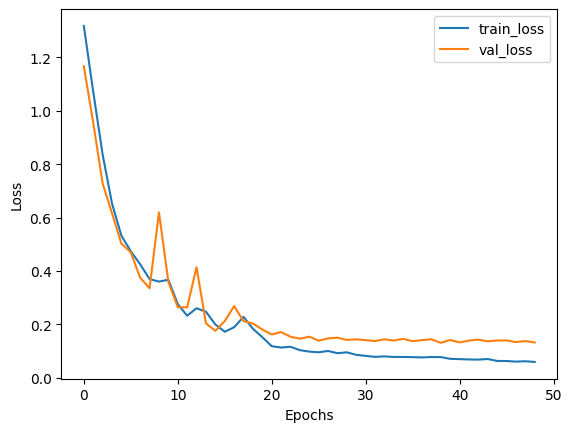

22/22 [==============================] - 0s 3ms/step


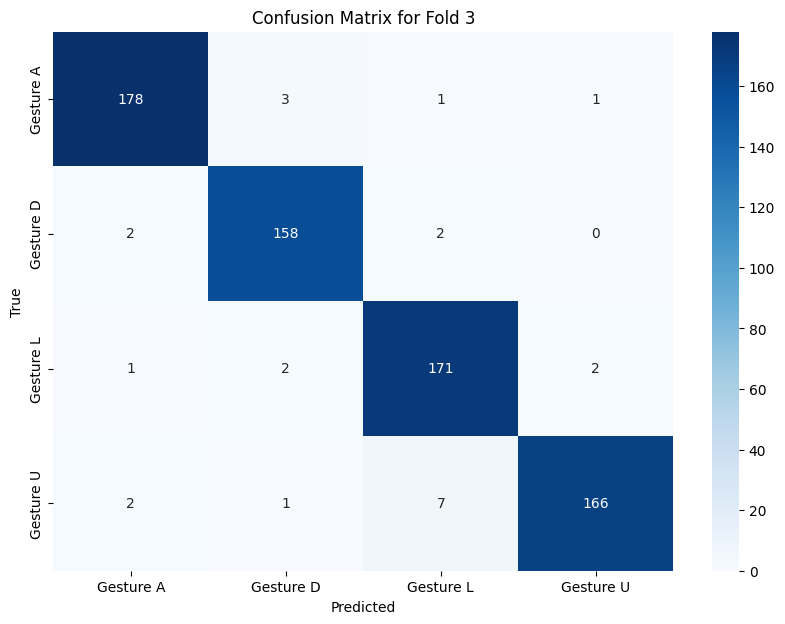

Epoch 1/100
22/22 [==============================] - 3s 38ms/step - loss: 1.3271 - accuracy: 0.3338 - val_loss: 1.2072 - val_accuracy: 0.4347 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 15ms/step - loss: 1.1548 - accuracy: 0.4597 - val_loss: 1.0189 - val_accuracy: 0.5022 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 15ms/step - loss: 0.9604 - accuracy: 0.5748 - val_loss: 0.7867 - val_accuracy: 0.6872 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 15ms/step - loss: 0.7322 - accuracy: 0.7013 - val_loss: 0.6414 - val_accuracy: 0.7217 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 15ms/step - loss: 0.6048 - accuracy: 0.7619 - val_loss: 0.5370 - val_accuracy: 0.8063 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 15ms/step - loss: 0.5007 - accuracy: 0.8046 - val_loss: 0.5403 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 15ms/step - lo

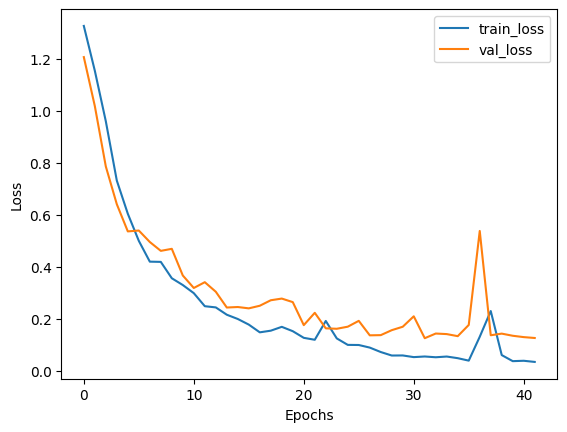

22/22 [==============================] - 0s 3ms/step


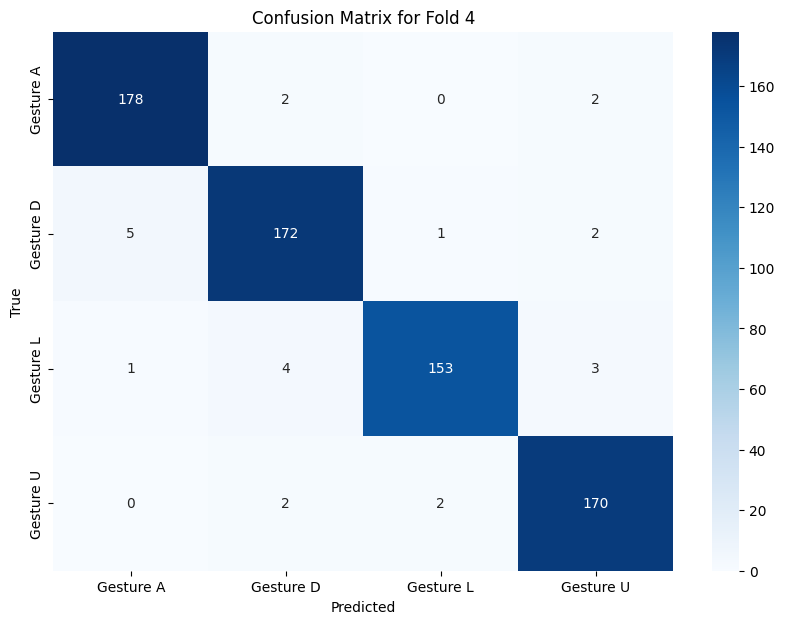

Epoch 1/100
22/22 [==============================] - 3s 40ms/step - loss: 1.3035 - accuracy: 0.3514 - val_loss: 1.1549 - val_accuracy: 0.4648 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 18ms/step - loss: 1.0585 - accuracy: 0.5271 - val_loss: 0.9438 - val_accuracy: 0.5681 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 18ms/step - loss: 0.8529 - accuracy: 0.6504 - val_loss: 0.7340 - val_accuracy: 0.7044 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 18ms/step - loss: 0.6706 - accuracy: 0.7329 - val_loss: 0.6652 - val_accuracy: 0.7504 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 18ms/step - loss: 0.6205 - accuracy: 0.7637 - val_loss: 0.5508 - val_accuracy: 0.7877 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 17ms/step - loss: 0.5115 - accuracy: 0.7999 - val_loss: 0.4835 - val_accuracy: 0.8192 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 18ms/step - lo

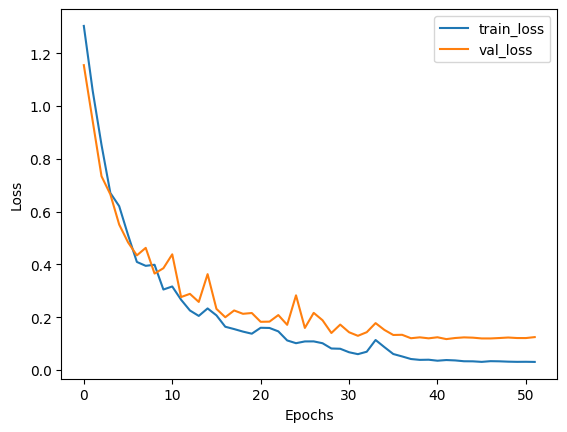

22/22 [==============================] - 0s 3ms/step


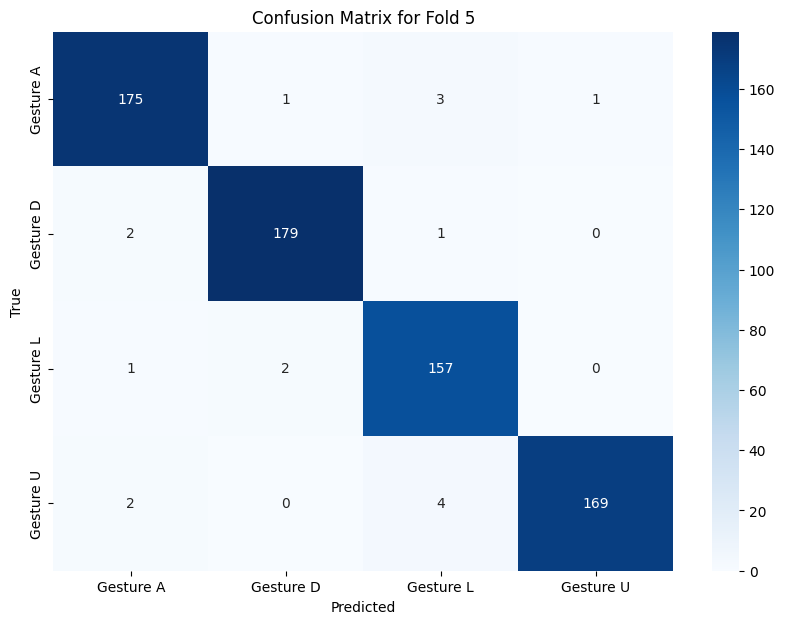

Cross-validation accuracies: [0.9613180756568909, 0.9799138903617859, 0.9655666947364807, 0.9655666947364807, 0.9756097793579102]
Mean accuracy: 0.9695950269699096


In [12]:
# Cross-Validation with KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, val_index in kfold.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_one_hot[train_index], y_one_hot[val_index]

    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(y_one_hot.shape[1], activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

    val_accuracy = model.evaluate(X_val, y_val)[1]
    accuracies.append(val_accuracy)

    plot_history(history)

    y_pred_val = model.predict(X_val)
    y_pred_val_classes = np.argmax(y_pred_val, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    cm = confusion_matrix(y_val_classes, y_pred_val_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Fold {len(accuracies)}')
    plt.show()

print(f"Cross-validation accuracies: {accuracies}")
print(f"Mean accuracy: {np.mean(accuracies)}")


In [13]:
# Evaluate on Independent Test Set
test_results = model.evaluate(test_X_scaled, test_y_one_hot)
print(f"Test Accuracy: {test_results[1] * 100:.2f}%")


25/25 [==============================] - 0s 5ms/step - loss: 0.1629 - accuracy: 0.9748
Test Accuracy: 97.48%


25/25 [==============================] - 0s 5ms/step
Classification Report (Test):
              precision    recall  f1-score   support

   Gesture A       0.95      0.98      0.97       193
   Gesture D       0.99      1.00      0.99       203
   Gesture L       0.96      0.95      0.96       194
   Gesture U       0.99      0.97      0.98       205

    accuracy                           0.97       795
   macro avg       0.97      0.97      0.97       795
weighted avg       0.98      0.97      0.97       795



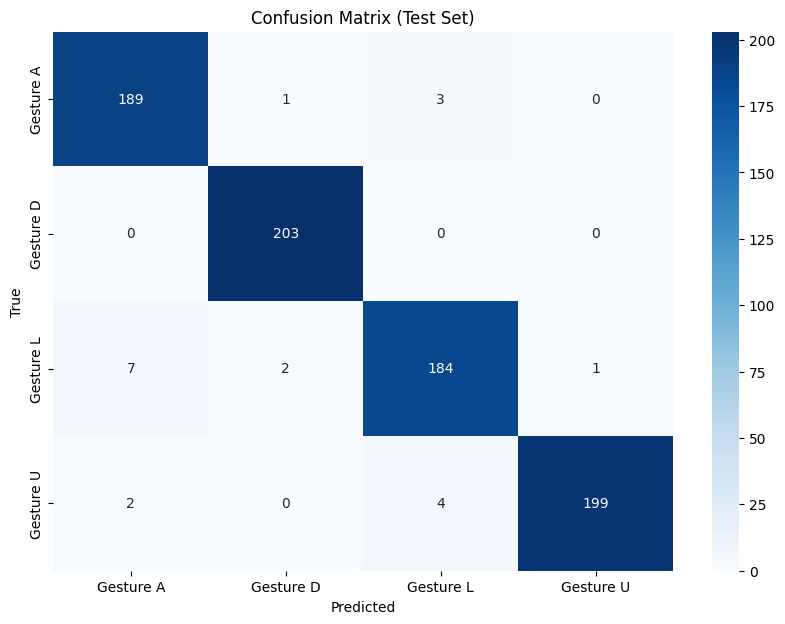

In [14]:
# Print Classification Report and Plot Confusion Matrix
y_pred_test = model.predict(test_X_scaled)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_test_classes = np.argmax(test_y_one_hot, axis=1)

print("Classification Report (Test):")
print(classification_report(y_test_classes, y_pred_test_classes, target_names=label_encoder.classes_))


cm_test = confusion_matrix(y_test_classes, y_pred_test_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()


In [15]:
# save model
model.save('E:/TFM/gesture_modelCNNNORX.keras')

# load keras model
model = tf.keras.models.load_model('E:/TFM/gesture_modelCNNNORX.keras')

# Converting models to TensorFlow Lite models
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Saving the converted model
try:
    tflite_model = converter.convert()
    with open('E:/TFM/gesture_modelCNNNORX.tflite', 'wb') as f:
       f.write(tflite_model)
    print("Model Conversion Successful")
except Exception as e:
    print(f"Model conversion failure: {e}")

INFO:tensorflow:Assets written to: C:\Users\yao20\AppData\Local\Temp\tmpv_c95bqw\assets


INFO:tensorflow:Assets written to: C:\Users\yao20\AppData\Local\Temp\tmpv_c95bqw\assets


INFO:tensorflow:Assets written to: C:\Users\yao20\AppData\Local\Temp\tmpjlzf203j\assets


INFO:tensorflow:Assets written to: C:\Users\yao20\AppData\Local\Temp\tmpjlzf203j\assets


Model Conversion Successful
